<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/%EA%B5%90%EC%9C%A1_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 예측

## Data 읽기

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

2.12.0


In [12]:
mnist = keras.datasets.mnist
(train_i, train_l), (test_i, test_l) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
print(train_i.shape)
print(train_l.shape)
print(test_i.shape)
print(test_l.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
train_i[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
for i in range(28):
  for j in range(28):
    print(num[i][j], end = ' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

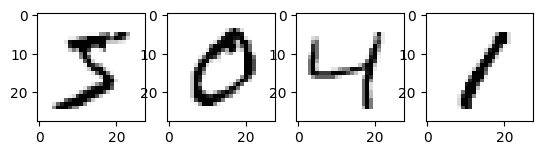

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_i[0], cmap = 'Greys')
ax2.imshow(train_i[1], cmap = 'Greys')
ax3.imshow(train_i[2], cmap = 'Greys')
ax4.imshow(train_i[3], cmap = 'Greys')

## 전처리

In [22]:
train_i, test_i = train_i / 255, test_i / 255

## 모델링

이진일 때는 sigmoid, 다분류일 때는 softmax

중간층(256)은 더 쌓아도 상관 없지만 과적합이 될 우려가 있음, 마지막 층은 무조건 범주의 수만큼 쌓을 것

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [28]:
256*784

200704

In [29]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
model.fit(train_i, train_l, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2270 - accuracy: 0.9335
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0931 - accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0622 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9860
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0333 - accuracy: 0.9894


In [32]:
test_loss, test_acc = model.evaluate(test_i, test_l, verbose = 2)
print('test loss = %.3f, test accuracy = %.3f' %(test_loss, test_acc))

313/313 - 1s - loss: 0.0693 - accuracy: 0.9781 - 557ms/epoch - 2ms/step
test loss = 0.069, test accuracy = 0.978


### Upgrade

> 1. 은닉층을 더 깊게 만든다
2. 에폭을 증가시킨다
3. 학습용 데이터를 늘린다
4. 하이퍼파라미터를 튜닝한다

In [37]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [38]:
model_2.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [39]:
model_2.fit(train_i, train_l, epochs = 10, verbose = 1)

test_loss, test_acc = model_2.evaluate(test_i, test_l, verbose = 0)
print('test loss = %.3f, test accuracy = %.3f' %(test_loss, test_acc))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2120 - accuracy: 0.9366
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0942 - accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0645 - accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0493 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0420 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0347 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0296 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

### My image

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

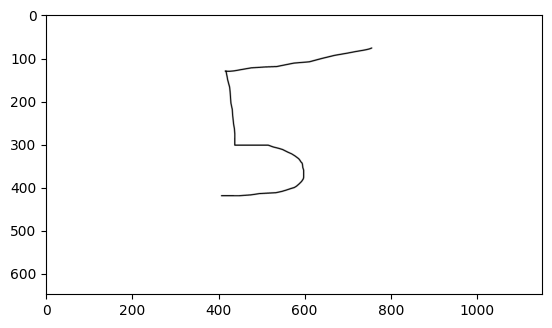

In [66]:
img = mpimg.imread('/content/5.png')
plt.imshow(img)

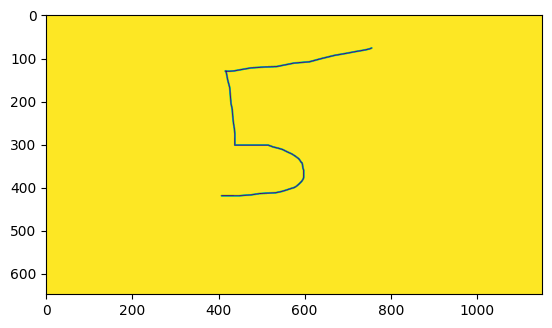

In [69]:
img = cv2.imread('/content/5.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [70]:
img.shape

(648, 1152)

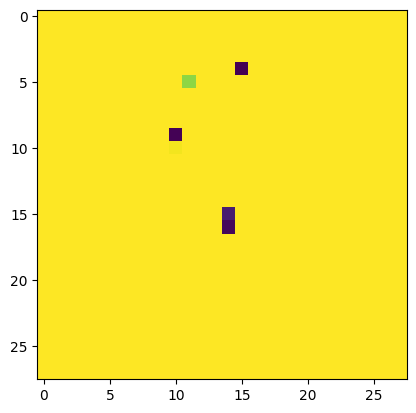

In [71]:
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [72]:
img.shape

(28, 28)

In [73]:
pred = model_2.predict(img[np.newaxis, :])
pred.argmax()

1/1 [==============================] - 0s 35ms/step


6

In [74]:
img = (255 - img) / 255
pred = model_2.predict(img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 22ms/step


8

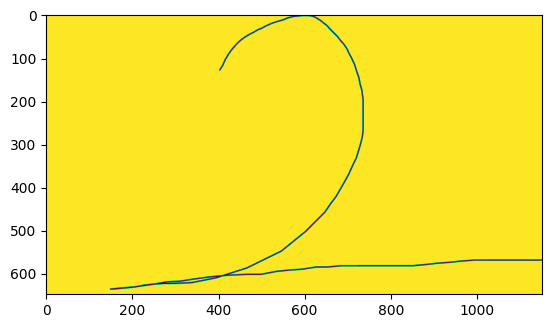

In [75]:
img = cv2.imread('/content/2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

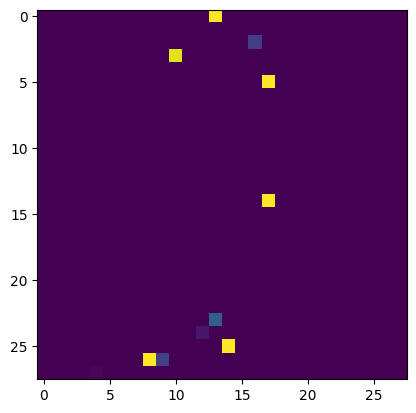

In [77]:
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [78]:
img = (255 - img) / 255
pred = model_2.predict(img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 22ms/step


6

### Iris data 분류

In [82]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_tr, x_te, y_tr, y_te = train_test_split(iris['data'], iris['target'], random_state = 0, test_size = 0.2)

In [87]:
x_tr[0].shape

(4,)

In [101]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = (4, )),
                                 keras.layers.Dense(60, activation = 'relu'),
                                 keras.layers.Dense(30, activation = 'relu'),
                                 keras.layers.Dense(3, activation = 'softmax')])

In [102]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist = model.fit(x_tr, y_tr, epochs = 30, batch_size = 5, verbose = 0)

In [99]:
model.evaluate(x_te, y_te, verbose = 1)

1/1 [==============================] - 0s 30ms/step - loss: 0.2437 - accuracy: 1.0000


[0.24371400475502014, 1.0]

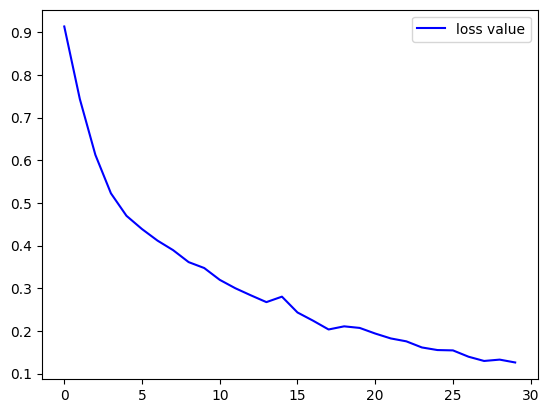

In [103]:
plt.plot(hist.history['loss'], 'b-', label = 'loss value')
plt.legend()

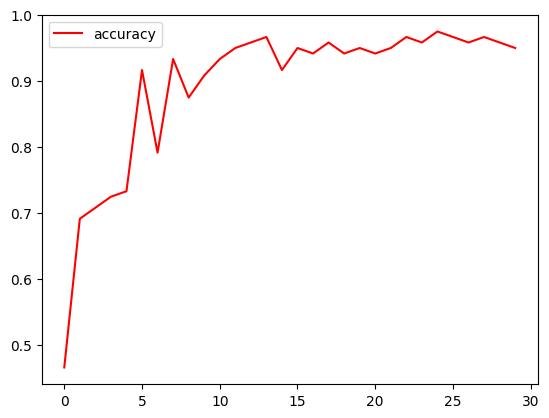

In [104]:
plt.plot(hist.history['accuracy'], 'r-', label = 'accuracy')
plt.legend()

In [107]:
model.save('/content/drive/MyDrive/iris_model.h5')

In [108]:
from keras.models import load_model

In [109]:
load = keras.models.load_model('/content/drive/MyDrive/iris_model.h5')

In [110]:
load.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 4)                 0         
                                                                 
 dense_14 (Dense)            (None, 60)                300       
                                                                 
 dense_15 (Dense)            (None, 30)                1830      
                                                                 
 dense_16 (Dense)            (None, 3)                 93        
                                                                 
Total params: 2,223
Trainable params: 2,223
Non-trainable params: 0
_________________________________________________________________


# 수치값 예측

In [113]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Data

In [115]:
x_tr = np.array([[0], [1], [2]])
y_tr = 3 * x_tr + 1

x_te = np.array([[3], [4], [5]])
y_te = 3 * x_te + 1

In [126]:
x_tr[0].shape

(1,)

In [118]:
x_tr.flatten()

array([0, 1, 2])

## 모델링

**선형회귀의 경우 출력단에 활성화 함수를 사용하지 않는다.**

In [119]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_shape = (1, )))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 8         
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'sgd',
              metrics = ['accuracy'])
model.fit(x_tr, y_tr, epochs = 30, batch_size = 2)

Epoch 1/30
2/2 [==============================] - 2s 14ms/step - loss: 17.3664 - accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 9ms/step - loss: 10.9459 - accuracy: 0.3333
Epoch 3/30
2/2 [==============================] - 0s 16ms/step - loss: 6.9653 - accuracy: 0.3333
Epoch 4/30
2/2 [==============================] - 0s 11ms/step - loss: 4.1753 - accuracy: 0.3333
Epoch 5/30
2/2 [==============================] - 0s 11ms/step - loss: 2.3642 - accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 0s 10ms/step - loss: 1.1352 - accuracy: 0.3333
Epoch 7/30
2/2 [==============================] - 0s 10ms/step - loss: 0.5469 - accuracy: 0.3333
Epoch 8/30
2/2 [==============================] - 0s 15ms/step - loss: 0.1997 - accuracy: 0.3333
Epoch 9/30
2/2 [==============================] - 0s 9ms/step - loss: 0.1393 - accuracy: 0.3333
Epoch 10/30
2/2 [==============================] - 0s 10ms/step - loss: 0.1321 - accuracy: 0.3333
Epoch 11/30
2/2 [========

In [123]:
pred = model.predict(x_te)
print(y_te.flatten())
print(pred.flatten())

1/1 [==============================] - 0s 48ms/step
[10 13 16]
[ 9.857536 12.73927  15.621003]
